# NASA meteorite analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [7]:
df = pd.read_csv('meteorite-landings.csv')
df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


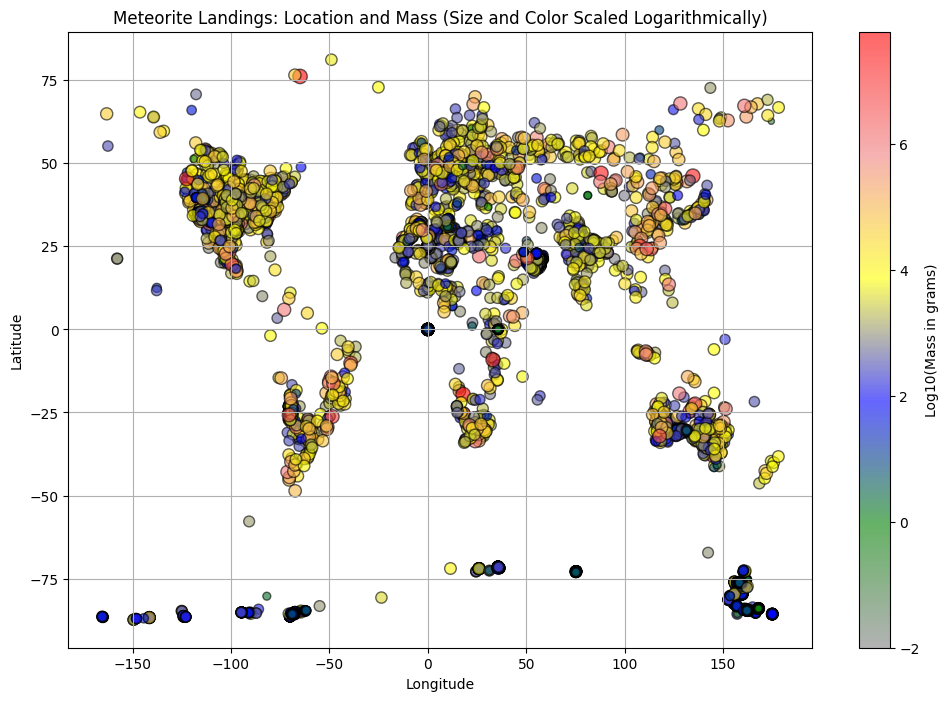

In [8]:
# Assuming the data has the following columns:
# - 'mass (g)' for the mass of the meteorite in grams,
# - 'reclat' for the latitude, and
# - 'reclong' for the longitude.
# Adjust these column names if needed.

# Filter out rows with non-positive mass and missing lat/long values.
df = df[(df['mass (g)'] > 0) & df['reclat'].notnull() & df['reclong'].notnull()]

# Apply a logarithmic transformation to handle the wide range in mass.
# Using np.log10 because masses can span multiple orders of magnitude.
log_mass = np.log10(df['mass (g)'])

# Shift the log_mass values so that the smallest value becomes 1 (instead of 0 or negative).
adjusted_log_mass = log_mass - log_mass.min() + 1

# Scale the adjusted log mass for marker sizes.
scaled_sizes = adjusted_log_mass * 10  # Adjust this multiplier to change the size variation.

# Create a custom colormap with a spectrum:
# From gray (small mass) to green, blue, yellow, light red, and red (largest mass).
cmap = LinearSegmentedColormap.from_list("Spectrum",
                                         ["gray", "green", "blue", "yellow", "lightcoral", "red"])

# Create the scatter plot using longitude and latitude.
plt.figure(figsize=(12, 8))
sc = plt.scatter(df['reclong'], df['reclat'],
                 s=scaled_sizes,       # Marker size based on adjusted log mass
                 c=log_mass,           # Color based on the original log-transformed mass
                 cmap=cmap,
                 alpha=0.6,
                 edgecolor='k')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Landings: Location and Mass (Size and Color Scaled Logarithmically)')
plt.grid(True)
plt.colorbar(sc, label='Log10(Mass in grams)')
plt.show()